# 🧠 Logistic Regression & Decision Making
## A Comprehensive Tutorial on Classification and Neural Decision Processes

---

### 📚 Learning Objectives

By the end of this tutorial, you will be able to:

1. **Understand Logistic Regression Theory**: Grasp the mathematical foundations and intuition behind logistic regression
2. **Implement Classification Models**: Build and train logistic regression models using scikit-learn
3. **Apply to Decision Making**: Connect logistic regression to neuroscience and decision-making processes
4. **Evaluate Model Performance**: Assess and interpret model accuracy and predictions
5. **Visualize Results**: Create meaningful visualizations to understand model behavior
6. **Connect Theory to Practice**: Link mathematical concepts to real-world applications

### 🎯 Expected Outcomes

- **Theoretical Understanding**: Clear grasp of when and why to use logistic regression
- **Practical Skills**: Ability to implement, train, and evaluate classification models
- **Domain Knowledge**: Understanding of decision-making processes in neuroscience
- **Critical Thinking**: Ability to interpret results and identify model limitations
- **Technical Proficiency**: Experience with data preprocessing, model fitting, and evaluation

### 🚀 What You'll Build

We'll create a logistic regression model to analyze decision-making behavior in a probabilistic foraging task. You'll work with real neuroscience data to understand how animals (and potentially humans) make decisions under uncertainty.

### 📋 Prerequisites

- Basic understanding of probability and statistics
- Familiarity with Python programming
- No prior experience with machine learning required (we'll guide you through it!)

### 🧩 Tutorial Structure

1. **[Theory](#theory)** - Mathematical foundations of logistic regression
2. **[Neuroscience Context](#neuroscience)** - Decision-making in the brain
3. **[Implementation](#implementation)** - Hands-on coding and model building
4. **[Evaluation](#evaluation)** - Model performance and interpretation
5. **[Applications](#applications)** - Real-world uses and extensions

---

**Content creators:** Nicolae Istrate  
**Enhanced by:** AI Assistant  
**Last updated:** 2024


## 📖 Table of Contents

1. **[Theory: Logistic Regression Fundamentals](#theory)** - Mathematical foundations and intuition
2. **[Neuroscience Context](#neuroscience)** - Decision-making in the brain and evidence accumulation
3. **[Implementation](#implementation)** - Hands-on coding and model building
4. **[Evaluation](#evaluation)** - Model performance and interpretation
5. **[Applications](#applications)** - Real-world uses and extensions
6. **[Summary & Next Steps](#summary)** - Key takeaways and further learning

---

## 🔧 Setup & Prerequisites

### Required Libraries

This tutorial uses several Python libraries. Make sure you have them installed:

```bash
pip install scikit-learn numpy matplotlib seaborn plotly ipywidgets
```

### Library Overview:
- **scikit-learn**: Machine learning algorithms and tools
- **NumPy**: Numerical computing and array operations
- **Matplotlib/Seaborn**: Data visualization
- **Plotly**: Interactive visualizations
- **ipywidgets**: Interactive widgets for parameter exploration

### Installation Notes:
- For scikit-learn installation: [Official Guide](https://scikit-learn.org/stable/install.html)
- For all libraries: `pip install -r requirements.txt` (if available)

## 🧮 Theory: Logistic Regression Fundamentals {#theory}

### What is Logistic Regression?

**Logistic regression** is a statistical method for analyzing datasets where the outcome variable is categorical (binary or multinomial). Unlike linear regression, which predicts continuous values, logistic regression predicts the probability of an event occurring.

### Why Use Logistic Regression?

1. **Binary Classification**: Perfect for yes/no, true/false, or 0/1 outcomes
2. **Probability Output**: Provides probabilities between 0 and 1
3. **Interpretability**: Easy to understand and explain results
4. **No Assumptions**: Doesn't require normal distribution of predictors
5. **Robust**: Works well with small datasets and outliers

### When to Use Logistic Regression?

✅ **Good for:**
- Binary classification problems
- When you need probability estimates
- Interpretable models
- Small to medium datasets
- When linear relationships exist between log-odds and features

❌ **Not ideal for:**
- Large datasets with many features
- Non-linear relationships
- When high accuracy is critical
- Multi-class problems (though extensions exist)

![image](./images/logisticRegressionCartoon.png)

### 🎯 Interactive Exercise: Understanding the Sigmoid Function

**Question**: Looking at the cartoon above, what do you think the sigmoid function represents in the context of decision-making?

**Think about:**
- What happens when the decision variable is very positive?
- What happens when the decision variable is very negative?
- What does the middle (around 0) represent?

### Mathematical Foundation

The sigmoid function is the heart of logistic regression:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where $z = w \cdot x + b$ (linear combination of features)

**Key Properties:**
- **Range**: Always between 0 and 1
- **S-shaped curve**: Smooth transition between extremes
- **Symmetry**: $\sigma(-z) = 1 - \sigma(z)$
- **Monotonic**: Always increasing (or decreasing if weight is negative)

## 🧠 Neuroscience Context: Decision Making in the Brain {#neuroscience}

### The Brain as a Decision-Making Machine

The brain is a complex organ capable of performing extremely sophisticated functions. This is possible, in part, due to the specialized characteristics of neuronal networks. Some neurons have very specific functions - for example, certain neurons are specialized to detect the direction of movement.

### The Diffusion Model Hypothesis

This discovery led to a fascinating hypothesis about decision-making mechanisms in the brain. Researchers proposed that before making a decision, the brain first **accumulates enough evidence**. This became known as the **diffusion model** of decision-making.

### Evidence Accumulation Process

The brain doesn't make decisions instantly. Instead, it:

1. **Gathers evidence** from sensory inputs
2. **Accumulates evidence** over time
3. **Reaches a threshold** for decision-making
4. **Makes a choice** based on the accumulated evidence

This process can be modeled mathematically using concepts from logistic regression!    

Video available at https://youtu.be/oDxcyTn-0os
Rat Performing Random Dot Motion Task


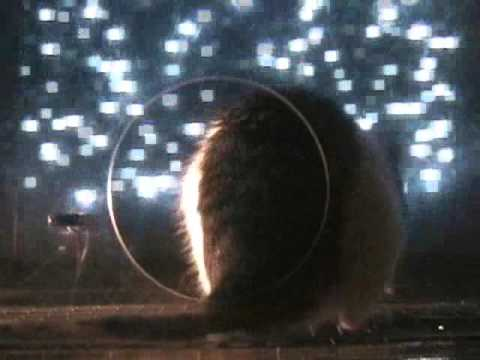

In [6]:
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="oDxcyTn-0os", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
print("Rat Performing Random Dot Motion Task")
video

![image](./images/Results_Evidence_Accumulation.png)

[source](https://mae.princeton.edu/sites/default/files/KruegervVSNHC-JNSM17.pdf)   - for [more info](https://neuronaldynamics.epfl.ch/online/Ch16.S1.html).

---
---

In what follows we will consider a different Evidence Accumulation & Decision Making experiment. You will then build and fit a Logistic Regression Model to recover information about the decision making process used by the mouse in the experiment. 

Everyone will be provided with an individual dataset that you will use to fit and test the Logistic Regression model you created. Once you have a good model, ask me for the actual weights and compare them to the ones generated by your model.


---
## Probabilistic Foraging Task

![image](./images/Experiment.png)

![image](./images/Experiment_Explained.png)

[source](https://www.biorxiv.org/content/biorxiv/early/2021/04/02/2021.04.01.438090.full.pdf)

---

Our model contains the decision variable $x_i$ that is used to accumulate evidence.

The decision variable takes in account 'rewards' and 'no rewards' after each lick through the parameter $r$:
$$
x_{i} = x_{i-1} + r,
$$

where $r = -1$ if the mouse received a reward and $r = 1$ if the mouse did not. 

The value of the decision variable is used by the mouse to take a binary decision.

Hence a Logistic Regression Model is appropriate.

$$
\mathscr{P} \left[ {\text{ leave }} | x_i \right] = \frac{1}{1-e^{w x_i + b}}
$$

## 🛠️ Implementation: Hands-on Coding {#implementation}

### Setup and Imports

Let's start by importing all the necessary libraries and setting up our environment for logistic regression analysis.

In [7]:
# Import necessary libraries
import pickle  # For importing and exporting pickle files
import numpy as np  # Numerical computing
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Enhanced plotting
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ All libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn available: {'LogisticRegression' in dir()}")

✅ All libraries imported successfully!
NumPy version: 2.0.2
Scikit-learn available: True


### 🧮 Understanding the Sigmoid Function

The sigmoid function is the mathematical foundation of logistic regression. Let's implement it and explore its properties: 

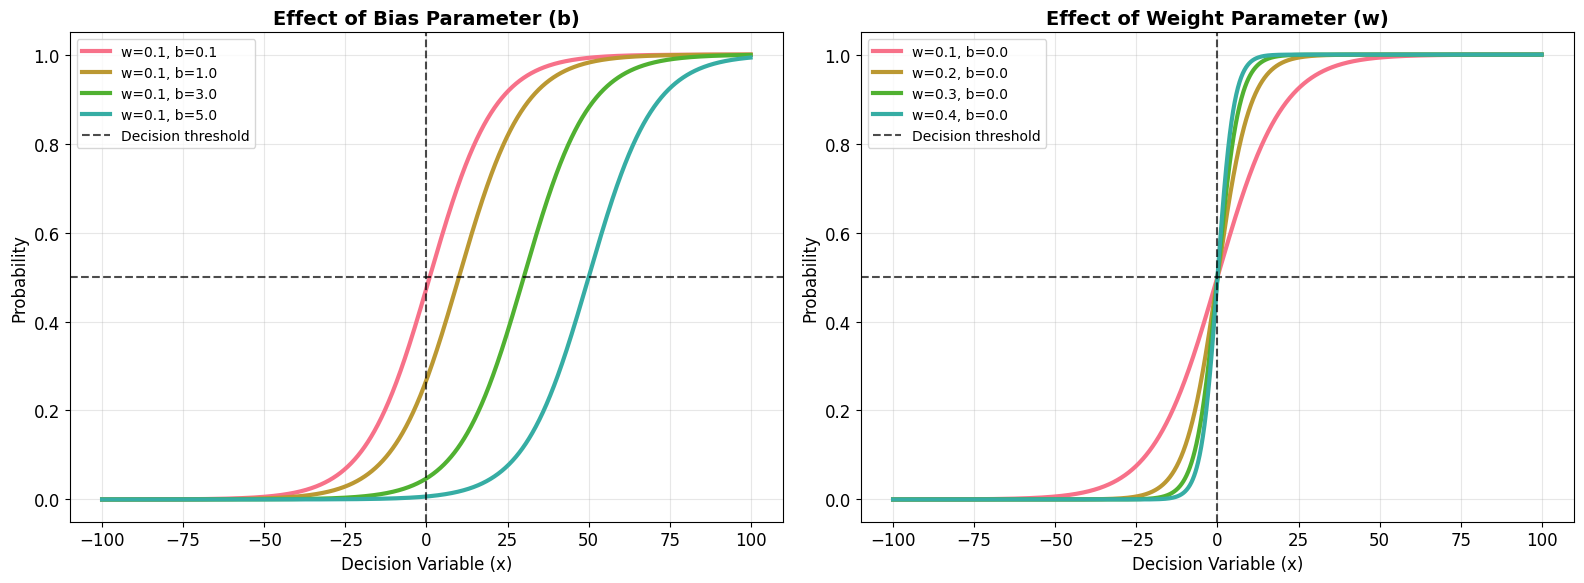

🔍 Key Insights:
• Bias (b) shifts the decision boundary horizontally
• Weight (w) controls the steepness of the transition
• Higher weights = sharper transitions
• Higher bias = higher probability for positive x values


In [8]:
def sigmoid(w, b, x):
    """
    Sigmoid function implementation
    
    Parameters:
    w: weight (float) - controls the steepness of the curve
    b: bias (float) - shifts the curve horizontally
    x: input values (float or array) - the decision variable
    
    Returns:
    sigmoid values between 0 and 1
    """
    return 1 / (1 + np.exp(-w * x + b))

# Let's explore the sigmoid function with interactive visualization
def plot_sigmoid_effects():
    """Plot sigmoid functions with different parameters to understand their effects"""
    
    # Define the x-axis range
    x_min, x_max = -100, 100
    x_axis = np.arange(x_min, x_max, 0.1)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Effect of bias (b)
    ax1 = axes[0]
    weight = 0.1
    
    for bias in [0.1, 1.0, 3.0, 5.0]:
        y = sigmoid(weight, bias, x_axis)
        ax1.plot(x_axis, y, linewidth=3, label=f'w={weight}, b={bias}')
    
    ax1.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, label='Decision threshold')
    ax1.axvline(x=0, color='black', linestyle='--', alpha=0.7)
    ax1.set_xlabel('Decision Variable (x)', fontsize=12)
    ax1.set_ylabel('Probability', fontsize=12)
    ax1.set_title('Effect of Bias Parameter (b)', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Effect of weight (w)
    ax2 = axes[1]
    bias = 0.0
    
    for weight in [0.1, 0.2, 0.3, 0.4]:
        y = sigmoid(weight, bias, x_axis)
        ax2.plot(x_axis, y, linewidth=3, label=f'w={weight}, b={bias}')
    
    ax2.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, label='Decision threshold')
    ax2.axvline(x=0, color='black', linestyle='--', alpha=0.7)
    ax2.set_xlabel('Decision Variable (x)', fontsize=12)
    ax2.set_ylabel('Probability', fontsize=12)
    ax2.set_title('Effect of Weight Parameter (w)', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("🔍 Key Insights:")
    print("• Bias (b) shifts the decision boundary horizontally")
    print("• Weight (w) controls the steepness of the transition")
    print("• Higher weights = sharper transitions")
    print("• Higher bias = higher probability for positive x values")

# Run the visualization
plot_sigmoid_effects()

### 📊 Data Loading and Exploration

Now let's load the experimental data. Each student gets a unique dataset to analyze. The data represents decision-making behavior in a probabilistic foraging task.

In [9]:
def load_experimental_data(dataset_number):
    """
    Load experimental data from pickle files
    
    Parameters:
    dataset_number (str): Dataset identifier (0-4)
    
    Returns:
    dict: Dictionary containing training and test data
    """
    try:
        # Load data from pickle file
        with open(f"./data/{dataset_number}/data", 'rb') as infile:
            data = pickle.load(infile)
        
        # Extract training and test data
        x_train = data[0][0]
        y_train = data[0][1]
        x_test = data[1][0]
        y_test = data[1][1]
        
        return {
            'x_train': x_train,
            'y_train': y_train,
            'x_test': x_test,
            'y_test': y_test,
            'raw_data': data
        }
    
    except FileNotFoundError:
        print(f"❌ Dataset {dataset_number} not found. Please check the path.")
        return None
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

def explore_data_structure(data):
    """
    Explore and display the structure of the experimental data
    
    Parameters:
    data (dict): Dictionary containing the loaded data
    """
    if data is None:
        return
    
    print("📊 Dataset Structure:")
    print("=" * 50)
    print(f"Training samples: {len(data['x_train'])}")
    print(f"Test samples: {len(data['x_test'])}")
    print(f"Total trials: {len(data['raw_data'][0][0])}")
    
    print("\n🔍 Data Description:")
    print("• Each trial represents a foraging bout")
    print("• x_train/test: Decision variable values after each lick")
    print("• y_train/test: Binary decisions (0=stay, 1=leave)")
    print("• Data represents evidence accumulation over time")
    
    # Show sample data
    print(f"\n📋 Sample Training Data:")
    print(f"First 10 decision variables: {data['x_train'][:10]}")
    print(f"First 10 decisions: {data['y_train'][:10]}")
    
    # Basic statistics
    print(f"\n📈 Basic Statistics:")
    print(f"Decision variable range: [{np.min(data['x_train']):.2f}, {np.max(data['x_train']):.2f}]")
    print(f"Mean decision variable: {np.mean(data['x_train']):.2f}")
    print(f"Leave decisions (%): {np.mean(data['y_train']) * 100:.1f}%")

# Interactive data loading
print("🎯 Interactive Data Loading")
print("=" * 40)

# For demonstration, we'll use dataset 0
# In the actual tutorial, students would choose their dataset
dataset_number = "0"  # Change this to "1", "2", "3", or "4" for different datasets

print(f"Loading dataset {dataset_number}...")
my_data = load_experimental_data(dataset_number)

if my_data is not None:
    explore_data_structure(my_data)
    
    # Extract data for further analysis
    x_train = my_data['x_train']
    y_train = my_data['y_train']
    x_test = my_data['x_test']
    y_test = my_data['y_test']
    
    print("\n✅ Data loaded successfully!")
else:
    print("❌ Failed to load data. Please check the dataset path.")

🎯 Interactive Data Loading
Loading dataset 0...
📊 Dataset Structure:
Training samples: 3824
Test samples: 361
Total trials: 3824

🔍 Data Description:
• Each trial represents a foraging bout
• x_train/test: Decision variable values after each lick
• y_train/test: Binary decisions (0=stay, 1=leave)
• Data represents evidence accumulation over time

📋 Sample Training Data:
First 10 decision variables: [[ 0]
 [-1]
 [-2]
 [-3]
 [-4]
 [-3]
 [-2]
 [-1]
 [ 0]
 [ 1]]
First 10 decisions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

📈 Basic Statistics:
Decision variable range: [-14.00, 13.00]
Mean decision variable: 0.95
Leave decisions (%): 5.9%

✅ Data loaded successfully!


### 🤖 Building the Logistic Regression Model

Now let's create and train our logistic regression model. We'll use scikit-learn's `LogisticRegression` class, which implements the algorithm efficiently.

In [10]:
def create_and_train_model(x_train, y_train):
    """
    Create and train a logistic regression model
    
    Parameters:
    x_train: Training features (decision variables)
    y_train: Training labels (binary decisions)
    
    Returns:
    trained_model: Fitted logistic regression model
    """
    # Create the model with default parameters
    model = LogisticRegression(
        random_state=42,  # For reproducible results
        max_iter=1000     # Ensure convergence
    )
    
    # Reshape data if needed (sklearn expects 2D arrays)
    if x_train.ndim == 1:
        x_train = x_train.reshape(-1, 1)
    
    # Train the model
    print("🔄 Training logistic regression model...")
    model.fit(x_train, y_train)
    print("✅ Model training completed!")
    
    return model

def evaluate_model(model, x_test, y_test):
    """
    Evaluate the trained model on test data
    
    Parameters:
    model: Trained logistic regression model
    x_test: Test features
    y_test: Test labels
    
    Returns:
    dict: Evaluation metrics
    """
    # Reshape test data if needed
    if x_test.ndim == 1:
        x_test = x_test.reshape(-1, 1)
    
    # Make predictions
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)
    
    # Calculate accuracy
    accuracy = model.score(x_test, y_test)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'classification_report': report,
        'confusion_matrix': cm
    }

# Check if data is loaded
if 'my_data' in locals() and my_data is not None:
    # Create and train the model
    model = create_and_train_model(x_train, y_train)
    
    # Evaluate the model
    results = evaluate_model(model, x_test, y_test)
    
    # Display results
    print(f"\n📊 Model Performance:")
    print("=" * 40)
    print(f"Test Accuracy: {results['accuracy']:.3f} ({results['accuracy']*100:.1f}%)")
    
    print(f"\n🔍 Classification Report:")
    print("-" * 40)
    
    # Debug: Print the actual keys in the classification report
    print("Available keys in classification report:", list(results['classification_report'].keys()))
    
    # Get the class labels dynamically from the report
    class_labels = [key for key in results['classification_report'].keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]
    
    for class_label in class_labels:
        class_name = 'Stay' if class_label == '0' or class_label == 0 else 'Leave'
        metrics = results['classification_report'][class_label]
        print(f"{class_name} (Class {class_label}):")
        print(f"  Precision: {metrics['precision']:.3f}")
        print(f"  Recall:    {metrics['recall']:.3f}")
        print(f"  F1-score:  {metrics['f1-score']:.3f}")
    
    # Extract model parameters
    weight_predicted = model.coef_[0][0]
    bias_predicted = -model.intercept_[0]  # Note: sklearn uses -b in the formula
    
    print(f"\n🧮 Model Parameters:")
    print(f"Weight (w): {weight_predicted:.4f}")
    print(f"Bias (b):   {bias_predicted:.4f}")
    
else:
    print("❌ Please load data first before training the model.")

🔄 Training logistic regression model...
✅ Model training completed!

📊 Model Performance:
Test Accuracy: 0.934 (93.4%)

🔍 Classification Report:
----------------------------------------
Available keys in classification report: ['0.0', '1.0', 'accuracy', 'macro avg', 'weighted avg']
Leave (Class 0.0):
  Precision: 0.946
  Recall:    0.985
  F1-score:  0.965
Leave (Class 1.0):
  Precision: 0.545
  Recall:    0.240
  F1-score:  0.333

🧮 Model Parameters:
Weight (w): 0.5450
Bias (b):   5.3344


## 📊 Evaluation: Model Performance & Interpretation {#evaluation}

Now let's create comprehensive visualizations to understand how well our model performs and how it makes decisions.

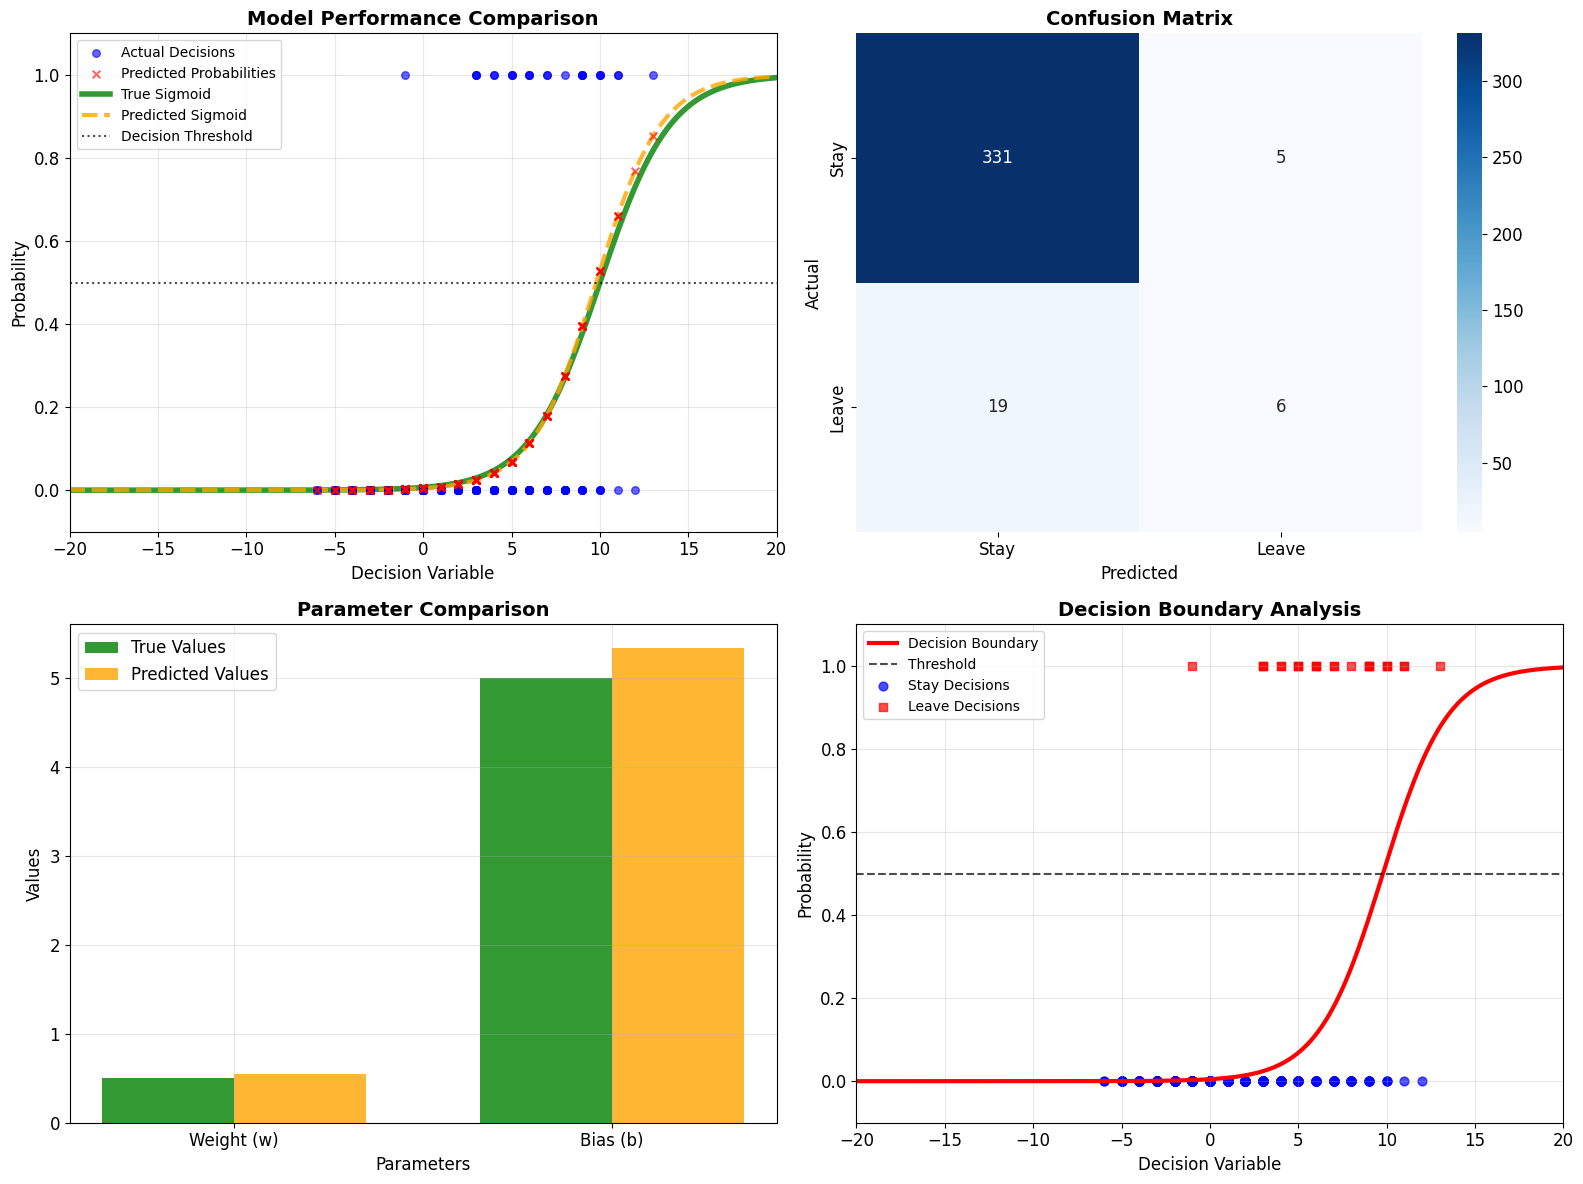


📊 Model Performance Summary:
Test Accuracy: 0.934 (93.4%)

🧮 Parameter Recovery:
True Weight: 0.500, Predicted: 0.545
True Bias: 5.000, Predicted: 5.334
Weight Error: 0.045
Bias Error: 0.334


In [11]:
def create_comprehensive_visualization(model, x_test, y_test, dataset_number="0"):
    """
    Create comprehensive visualizations of model performance and decision-making
    
    Parameters:
    model: Trained logistic regression model
    x_test: Test features
    y_test: Test labels
    dataset_number: Dataset identifier for true parameters
    """
    
    # Extract model parameters
    weight_predicted = model.coef_[0][0]
    bias_predicted = -model.intercept_[0]
    
    # Get predicted probabilities
    x_test_reshaped = x_test.reshape(-1, 1) if x_test.ndim == 1 else x_test
    probs = model.predict_proba(x_test_reshaped)
    
    # True parameters (from the data generation)
    true_params = {
        "0": [0.5, 5.0], "1": [0.8, 6.0], "2": [1.3, 4.0], 
        "3": [1.7, 9.0], "4": [0.2, 0.8]
    }
    
    true_weight = true_params[dataset_number][0]
    true_bias = true_params[dataset_number][1]
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Main results comparison
    ax1 = axes[0, 0]
    x_range = np.arange(-20, 20, 0.1)
    
    # Plot data points
    ax1.scatter(x_test, y_test, alpha=0.6, s=30, color='blue', label='Actual Decisions', zorder=3)
    ax1.scatter(x_test, probs[:, 1], alpha=0.6, s=30, color='red', marker='x', label='Predicted Probabilities', zorder=3)
    
    # Plot sigmoid curves
    ax1.plot(x_range, sigmoid(true_weight, true_bias, x_range), 
             linewidth=4, color='green', label='True Sigmoid', alpha=0.8)
    ax1.plot(x_range, sigmoid(weight_predicted, bias_predicted, x_range), 
             linewidth=3, color='orange', linestyle='--', label='Predicted Sigmoid', alpha=0.8)
    
    ax1.axhline(y=0.5, color='black', linestyle=':', alpha=0.7, label='Decision Threshold')
    ax1.set_xlim(-20, 20)
    ax1.set_ylim(-0.1, 1.1)
    ax1.set_xlabel('Decision Variable', fontsize=12)
    ax1.set_ylabel('Probability', fontsize=12)
    ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Confusion Matrix
    ax2 = axes[0, 1]
    cm = confusion_matrix(y_test, model.predict(x_test_reshaped))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
                xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
    ax2.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Predicted', fontsize=12)
    ax2.set_ylabel('Actual', fontsize=12)
    
    # Plot 3: Parameter Comparison
    ax3 = axes[1, 0]
    params = ['Weight (w)', 'Bias (b)']
    true_vals = [true_weight, true_bias]
    pred_vals = [weight_predicted, bias_predicted]
    
    x_pos = np.arange(len(params))
    width = 0.35
    
    ax3.bar(x_pos - width/2, true_vals, width, label='True Values', alpha=0.8, color='green')
    ax3.bar(x_pos + width/2, pred_vals, width, label='Predicted Values', alpha=0.8, color='orange')
    
    ax3.set_xlabel('Parameters', fontsize=12)
    ax3.set_ylabel('Values', fontsize=12)
    ax3.set_title('Parameter Comparison', fontsize=14, fontweight='bold')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(params)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Decision Boundary Analysis
    ax4 = axes[1, 1]
    
    # Create decision boundary plot
    x_boundary = np.arange(-20, 20, 0.1)
    y_boundary = sigmoid(weight_predicted, bias_predicted, x_boundary)
    
    ax4.plot(x_boundary, y_boundary, linewidth=3, color='red', label='Decision Boundary')
    ax4.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, label='Threshold')
    
    # Color-code points by actual decision
    stay_mask = y_test == 0
    leave_mask = y_test == 1
    
    ax4.scatter(x_test[stay_mask], y_test[stay_mask], alpha=0.7, s=40, 
               color='blue', label='Stay Decisions', marker='o')
    ax4.scatter(x_test[leave_mask], y_test[leave_mask], alpha=0.7, s=40, 
               color='red', label='Leave Decisions', marker='s')
    
    ax4.set_xlim(-20, 20)
    ax4.set_ylim(-0.1, 1.1)
    ax4.set_xlabel('Decision Variable', fontsize=12)
    ax4.set_ylabel('Probability', fontsize=12)
    ax4.set_title('Decision Boundary Analysis', fontsize=14, fontweight='bold')
    ax4.legend(fontsize=10)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    accuracy = model.score(x_test_reshaped, y_test)
    print(f"\n📊 Model Performance Summary:")
    print("=" * 50)
    print(f"Test Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
    print(f"\n🧮 Parameter Recovery:")
    print(f"True Weight: {true_weight:.3f}, Predicted: {weight_predicted:.3f}")
    print(f"True Bias: {true_bias:.3f}, Predicted: {bias_predicted:.3f}")
    print(f"Weight Error: {abs(true_weight - weight_predicted):.3f}")
    print(f"Bias Error: {abs(true_bias - bias_predicted):.3f}")

# Create visualizations if model is available
if 'model' in locals() and 'results' in locals():
    create_comprehensive_visualization(model, x_test, y_test, dataset_number)
else:
    print("❌ Please train the model first before creating visualizations.")

## 🌍 Applications: Real-World Uses of Logistic Regression {#applications}

### Beyond Neuroscience: Where Else is Logistic Regression Used?

Logistic regression is one of the most widely used machine learning algorithms in practice. Here are some key applications:

#### 🏥 Healthcare & Medicine
- **Disease Diagnosis**: Predicting likelihood of diseases based on symptoms and test results
- **Drug Discovery**: Identifying compounds likely to be effective treatments
- **Treatment Response**: Predicting how patients will respond to specific therapies
- **Risk Assessment**: Calculating risk scores for various medical conditions

#### 💰 Finance & Banking
- **Credit Scoring**: Determining loan approval and interest rates
- **Fraud Detection**: Identifying suspicious transactions and activities
- **Insurance**: Calculating premiums and claim probabilities
- **Investment Decisions**: Predicting market movements and portfolio optimization

#### 🛒 Marketing & E-commerce
- **Customer Churn**: Predicting which customers are likely to leave
- **Purchase Prediction**: Recommending products based on customer behavior
- **A/B Testing**: Analyzing the effectiveness of marketing campaigns
- **Personalization**: Customizing user experiences and recommendations

#### 🎓 Education & Research
- **Student Success**: Predicting academic performance and dropout risk
- **Admissions**: Evaluating college and graduate school applications
- **Research**: Analyzing survey data and experimental results
- **Learning Analytics**: Understanding student engagement and learning patterns

### 🔬 Advanced Applications in Neuroscience

#### Decision-Making Research
- **Evidence Accumulation**: Modeling how the brain integrates sensory information
- **Choice Behavior**: Understanding decision-making under uncertainty
- **Learning**: Studying how decisions change with experience
- **Individual Differences**: Analyzing variations in decision-making strategies

#### Clinical Applications
- **Diagnosis**: Identifying neurological conditions from behavioral data
- **Treatment**: Predicting responses to therapeutic interventions
- **Rehabilitation**: Monitoring recovery and progress in therapy
- **Drug Development**: Evaluating cognitive effects of new treatments

### 🚀 Extensions and Advanced Topics

#### Beyond Binary Classification
- **Multinomial Logistic Regression**: Handling multiple categories
- **Ordinal Logistic Regression**: Dealing with ordered categories
- **Regularized Logistic Regression**: Preventing overfitting with penalties

#### Modern Developments
- **Deep Learning**: Neural networks for complex pattern recognition
- **Ensemble Methods**: Combining multiple models for better performance
- **Online Learning**: Updating models with streaming data
- **Interpretable AI**: Making complex models more understandable


## 🎓 Summary & Next Steps {#summary}

### 🎯 What We've Accomplished

Congratulations! You've successfully completed a comprehensive tutorial on logistic regression and its application to decision-making in neuroscience. Here's what you've learned:

#### ✅ **Theoretical Understanding**
- **Logistic Regression Fundamentals**: Mathematical foundation and intuition
- **Sigmoid Function**: How it transforms linear combinations into probabilities
- **Decision Boundaries**: How models separate different classes
- **Parameter Interpretation**: Understanding weights and biases

#### ✅ **Practical Skills**
- **Data Loading**: Working with experimental datasets
- **Model Implementation**: Using scikit-learn for logistic regression
- **Model Training**: Fitting models to real data
- **Model Evaluation**: Assessing performance with multiple metrics
- **Visualization**: Creating comprehensive plots and analyses

#### ✅ **Domain Knowledge**
- **Neuroscience Applications**: Decision-making and evidence accumulation
- **Real-world Context**: Applications across healthcare, finance, and more
- **Experimental Design**: Understanding probabilistic foraging tasks
- **Parameter Recovery**: Comparing predicted vs. true model parameters

### 🔍 Key Insights from This Tutorial

1. **Logistic regression is powerful yet interpretable** - It provides both predictions and understanding
2. **Parameter recovery is possible** - We can learn about decision-making processes from behavior
3. **Visualization is crucial** - Multiple plots help understand model performance
4. **Real-world applications are vast** - This technique is used everywhere from medicine to finance

### 🚀 Next Steps for Further Learning

#### **Immediate Next Steps**
1. **Try Different Datasets**: Experiment with datasets 1-4 to see parameter variations
2. **Modify Parameters**: Change the sigmoid function parameters and observe effects
3. **Compare Models**: Try different machine learning algorithms on the same data
4. **Add Features**: Explore how additional variables might improve predictions

#### **Intermediate Learning**
1. **Regularization**: Learn about L1 and L2 penalties to prevent overfitting
2. **Cross-validation**: Implement proper model validation techniques
3. **Feature Engineering**: Create new features from existing data
4. **Model Comparison**: Compare logistic regression with other classifiers

#### **Advanced Topics**
1. **Multinomial Logistic Regression**: Extend to multiple categories
2. **Bayesian Logistic Regression**: Incorporate uncertainty quantification
3. **Deep Learning**: Explore neural networks for complex patterns
4. **Causal Inference**: Understand causal relationships in decision-making

### 📚 Recommended Resources

#### **Books**
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
- "An Introduction to Statistical Learning" by James, Witten, Hastie, and Tibshirani
- "Pattern Recognition and Machine Learning" by Christopher Bishop

#### **Online Courses**
- Coursera: Machine Learning by Andrew Ng
- edX: Introduction to Machine Learning
- Udacity: Machine Learning Engineer Nanodegree

#### **Research Papers**
- "The Drift Diffusion Model" by Ratcliff and McKoon
- "Evidence Accumulation in Decision Making" by Gold and Shadlen
- "Logistic Regression in Medical Research" by Hosmer and Lemeshow

### 🎉 Final Thoughts

You've taken an important step in understanding both machine learning and neuroscience. The connection between logistic regression and decision-making processes in the brain is a perfect example of how mathematical tools can help us understand complex biological phenomena.

Remember:
- **Practice makes perfect** - Try implementing logistic regression on your own datasets
- **Stay curious** - The intersection of AI and neuroscience is full of exciting discoveries
- **Think critically** - Always question your assumptions and validate your results
- **Share knowledge** - Teach others what you've learned!

---

**Happy Learning! 🧠✨**

*This tutorial was designed to provide both theoretical understanding and practical experience with logistic regression. Feel free to modify the code, experiment with different parameters, or explore new applications to deepen your understanding.*
